Found 3 subjects, e.g. [WindowsPath('F:/Project/GNNCapstoneProject/dataset/brats-2021-task1/BraTS2021_00495'), WindowsPath('F:/Project/GNNCapstoneProject/dataset/brats-2021-task1/BraTS2021_00621'), WindowsPath('F:/Project/GNNCapstoneProject/dataset/brats-2021-task1/BraTS2021_Training_Data')]
Visualizing subject: BraTS2021_00495
  -> Loading file: BraTS2021_00495_t1.nii.gz


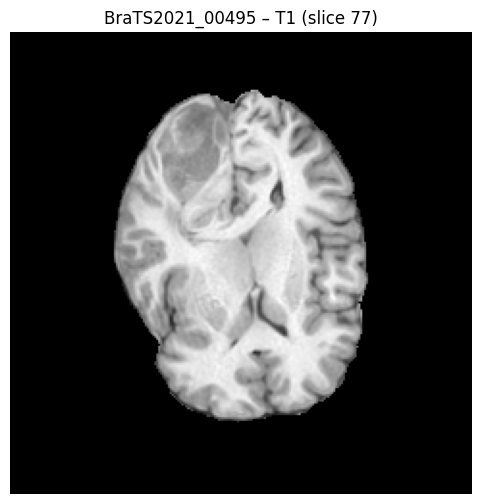

In [12]:
from pathlib import Path
import nibabel as nib
import matplotlib.pyplot as plt

# 1. Point to your dataset root
root = Path(r"F:\\Project\\GNNCapstoneProject\\dataset\\brats-2021-task1")

# 2. List only the subject directories (skip the .tar files)
subjects = [p for p in root.iterdir()
            if p.is_dir() and p.name.startswith("BraTS2021_")]
print(f"Found {len(subjects)} subjects, e.g. {subjects[:3]}")

# 3. Pick one subject (or loop through them)
subj = subjects[0]
print("Visualizing subject:", subj.name)

# 4. Locate the T1 file
t1_files = list(subj.glob("*_t1.nii*"))
if not t1_files:
    raise FileNotFoundError(f"No T1 found in {subj}")
t1_path = t1_files[0]
print("  -> Loading file:", t1_path.name)

# 5. Load and extract data
img = nib.load(str(t1_path))
vol = img.get_fdata()  # shape (X, Y, Z)

# 6. Choose a slice index and display
slice_idx = vol.shape[2] // 2  # middle axial slice
slice_img = vol[:, :, slice_idx].T  # transpose for correct orientation

plt.figure(figsize=(6,6))
plt.imshow(slice_img, cmap="gray", origin="lower")
plt.title(f"{subj.name} – T1 (slice {slice_idx})")
plt.axis("off")
plt.show()


In [ ]:
from pathlib import Path
import nibabel as nib
import matplotlib.pyplot as plt

def display_middle_slice(nifti_path: str, plane: str = "axial"):
    """
    Load a NIfTI file and display its middle slice.
    
    Args:
        nifti_path: Path to a .nii or .nii.gz file.
        plane:      Which plane to view: "axial", "coronal", or "sagittal".
    """
    p = Path(nifti_path)
    if not p.exists():
        raise FileNotFoundError(f"File not found: {p}")
    
    # Load volume
    img = nib.load(str(p))
    vol = img.get_fdata()
    
    # Choose slice index
    if plane == "axial":
        idx = vol.shape[2] // 2
        slice_img = vol[:, :, idx].T
    elif plane == "coronal":
        idx = vol.shape[1] // 2
        slice_img = vol[:, idx, :].T
    elif plane == "sagittal":
        idx = vol.shape[0] // 2
        slice_img = vol[idx, :, :].T
    else:
        raise ValueError("Plane must be 'axial', 'coronal', or 'sagittal'")
    
    # Plot
    plt.figure(figsize=(6,6))
    plt.imshow(slice_img, cmap="gray", origin="lower")
    plt.title(f"{p.name} — {plane.capitalize()} slice {idx}")
    plt.axis("off")
    plt.show()


In [25]:
visualize_all_slices("F:\\Project\\GNNCapstoneProject\\dataset\\brats-2021-task1", modality="t1")


FileNotFoundError: No t1 files found in F:\Project\GNNCapstoneProject\dataset\brats-2021-task1